### minimize MSE closed-form solution called Normal equation

$$
\theta = \left( X^T X \right)^{-1} X^T y
$$

y = 4 + 3x1 + Gaussian noise

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best # smaller the dataset the harder

array([[4.21509616],
       [2.77011339]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

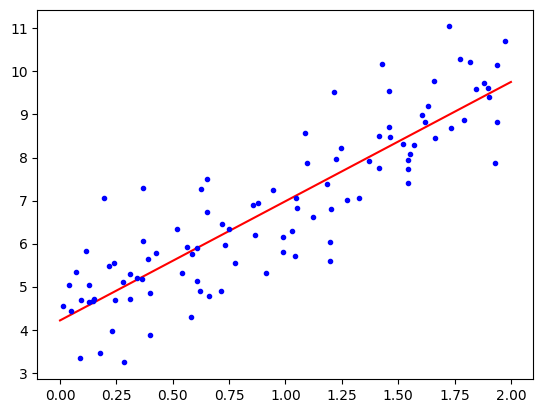

In [23]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-",label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() # based on np.linalg.lstsq
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [25]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Moore–Penrose inverse
$$
\hat{\theta} = X^+ y
$$
pseudoinverse of X
$$
X^+ 
$$


In [28]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

pseudoinverse is calculated using singular value decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices

numpy.linalg.svd()
$$
U \Sigma V^\top
$$

$$
X^+ = V \Sigma^+ U^\top
$$

Σ+ is the pseudoinverse of the diagonal matrix Σ, which involves taking the reciprocal of all nonzero singular values and transposing the matrix.

This approach is more efficient than computing the Normal equation. Normal equation may not
work if the matrix X⊺X is not invertible (i.e., singular), if m < n or if some
features are redundant, but the pseudoinverse is always defined.

inverting a matrix is typically about O(n^2.4) to O(n^3), `LinearRegression` class is O(n^2)